In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive
from Code.UCBLearnerSlidingWindow import UCBLearnerSlidingWindow

%matplotlib inline

In [2]:
cust_json = "customer3_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   ] 88.9%
loading: [===========================   ] 89.8%
loading: [============================  ] 90.8%
loading: [============================  ] 91.8%
loading: [============================  ] 92.8%
loading: [============================= 

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[2, 1, 2, 1, 1]
t:  2
phase 0
[1, 0, 1, 2, 2]
t:  3
phase 0
[2, 1, 1, 1, 1]
t:  4
phase 0
[2, 2, 0, 3, 0]
t:  5
phase 0
[0, 3, 0, 0, 3]
t:  6
phase 0
[2, 1, 3, 0, 2]
t:  7
phase 0
[3, 3, 2, 0, 1]
t:  8
phase 0
[2, 1, 1, 1, 2]
t:  9
phase 0
loading: [=                             ] 3.3%
[2, 1, 1, 1, 0]
t:  10
phase 0
[2, 2, 2, 2, 1]
t:  11
phase 0
[1, 0, 3,

[2, 2, 2, 1, 2]
t:  197
phase 1
[1, 3, 2, 0, 2]
t:  198
phase 1
[3, 1, 2, 1, 1]
t:  199
phase 1
loading: [====================          ] 66.7%
[3, 2, 2, 3, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.13 0.4  0.   0.  ]
 [0.   0.   0.01 0.53]
 [0.07 0.44 0.07 0.  ]
 [0.04 0.18 0.3  0.04]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.03 0.62 0.03]
 [0.   0.3  0.02 0.  ]
 [0.   0.   0.07 0.3 ]
 [0.   0.36 0.19 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]
[2, 2, 2, 0, 2]
t:  201
phase 2
[1, 2, 1, 1, 2]
t:  202
phase 2
[0, 2, 2, 1, 3]
t:  203
phase 2
[3, 2, 0, 1, 2]
t:  204
phase 2
[2, 2, 2, 1, 2]
t:  205
phase 2
[0, 2, 2, 3, 2]
t:  206
phase 2
[1, 2, 2, 3, 2]
t:  207
phase 2
abrupt change
[3, 3, 3, 2, 3]
t:  208
phase 2
[2, 1, 1, 2, 1]
t:  209
phase 2
l

[2, 1, 1, 1, 2]
t:  93
phase 0
[2, 1, 2, 1, 2]
t:  94
phase 0
[2, 3, 1, 1, 1]
t:  95
phase 0
[2, 1, 3, 1, 3]
t:  96
phase 0
[2, 1, 1, 1, 2]
t:  97
phase 0
[2, 1, 1, 1, 2]
t:  98
phase 0
[2, 2, 1, 1, 2]
t:  99
phase 0
loading: [==========                    ] 33.3%
[2, 1, 1, 1, 2]
t:  100
phase 1
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.04 0.8  0.  ]
 [0.   0.3  0.   0.  ]
 [0.05 0.24 0.4  0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.01 0.53 0.08 0.  ]
 [0.6  0.01 0.   0.  ]
 [0.   0.42 0.23 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.13 0.24 0.   0.  ]
 [0.04 0.39 0.67 0.39]
 [0.04 0.19 0.48 0.11]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.13 0.24 0.   0.  ]
 [0.04 0.39 0.67 0.39]
 [0.04 0.19 0.48 0.11]]
[2, 0, 1, 1, 2]
t:  101
phase 1
[2, 1, 2, 0, 2]
t:  102
phase 1
[2, 3, 2, 1, 2]
t:  103
phase 1
[3, 2, 2, 3, 2]
t:  104
phase 1
[2, 1, 2, 1, 2]
t:  105
phase 1
abrupt change
[3, 3, 3

[3, 2, 3, 1, 2]
t:  288
phase 2
[1, 1, 3, 2, 2]
t:  289
phase 2
loading: [============================= ] 96.7%
[2, 1, 3, 2, 2]
t:  290
phase 2
[3, 1, 3, 2, 2]
t:  291
phase 2
[2, 2, 1, 1, 2]
t:  292
phase 2
[3, 1, 3, 2, 1]
t:  293
phase 2
[0, 3, 3, 3, 1]
t:  294
phase 2
[1, 1, 3, 0, 2]
t:  295
phase 2
[2, 1, 0, 1, 2]
t:  296
phase 2
[3, 3, 2, 3, 3]
t:  297
phase 2
[0, 1, 3, 2, 2]
t:  298
phase 2
[1, 1, 3, 3, 2]
t:  299
phase 2
Iteration # 3
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0

[1, 1, 2, 2, 2]
t:  185
phase 1
[2, 0, 2, 1, 2]
t:  186
phase 1
[3, 2, 2, 2, 2]
t:  187
phase 1
[0, 3, 2, 1, 2]
t:  188
phase 1
[2, 1, 2, 1, 2]
t:  189
phase 1
loading: [===================           ] 63.3%
[1, 2, 2, 1, 2]
t:  190
phase 1
[3, 3, 2, 1, 2]
t:  191
phase 1
[2, 0, 3, 1, 2]
t:  192
phase 1
[3, 2, 2, 1, 2]
t:  193
phase 1
[0, 1, 2, 1, 2]
t:  194
phase 1
[1, 3, 0, 1, 2]
t:  195
phase 1
[2, 0, 2, 1, 2]
t:  196
phase 1
[3, 2, 2, 1, 2]
t:  197
phase 1
[2, 1, 2, 1, 2]
t:  198
phase 1
[3, 3, 2, 1, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[1, 0, 2, 1, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.13 0.4  0.   0.  ]
 [0.   0.   0.01 0.53]
 [0.07 0.44 0.07 0.  ]
 [0.04 0.18 0.3  0.04]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.03 0.62 0.03]
 [0.   0.3  0.02 0.  ]
 [0.   0.   0.07 0.3 ]
 [0.   0.36 0.19 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]

(3, 300)

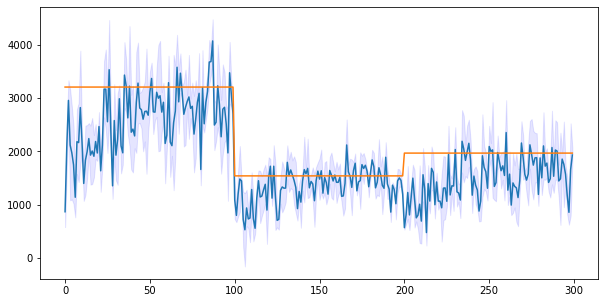

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)


plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

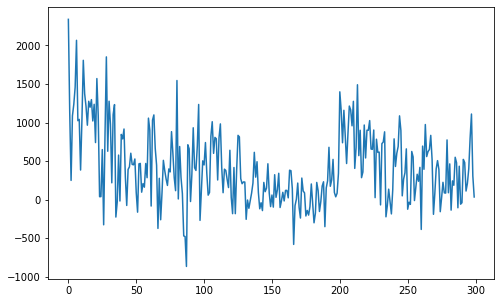

In [7]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

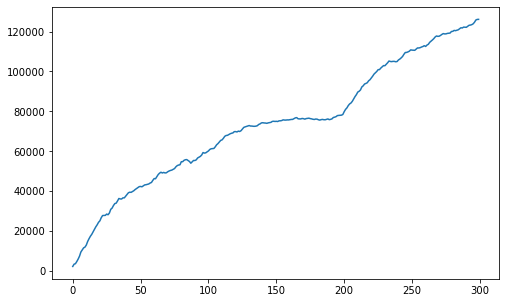

In [8]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [9]:
n_products

5

In [10]:
n_arms

4

In [11]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [12]:
array

array([[0.7, 0.4, 0.2, 0.6],
       [0.6, 0.6, 0.2, 0.8],
       [0.2, 0.9, 0.6, 0.3],
       [0.3, 0.2, 0.9, 0.6],
       [0.1, 0.7, 0.7, 0.6]])

In [13]:
randrange(0,1)

0

In [14]:
cust_json = "customer3_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   ] 88.9%
loading: [===========================   ] 89.8%
loading: [============================  ] 90.8%
loading: [============================  ] 91.8%
loading: [============================  ] 92.8%
loading: [============================= ] 93.8%
loading: [============================= 

In [15]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerSlidingWindow(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[1, 1, 2, 1, 1]
t:  2
phase 0
[2, 0, 1, 3, 0]
t:  3
phase 0
[0, 1, 1, 1, 2]
t:  4
phase 0
[2, 3, 0, 1, 3]
t:  5
phase 0
[3, 1, 1, 1, 1]
t:  6
phase 0
[1, 1, 2, 1, 2]
t:  7
phase 0
[2, 3, 3, 0, 2]
t:  8
phase 0
[2, 2, 1, 0, 3]
t:  9
phase 0
loading: [=                             ] 3.3%
[2, 0, 2, 2, 2]
t:  10
phase 0
[2, 1, 1, 1, 2]
t:  11
phase 0
[2, 3, 1,

[1, 3, 2, 2, 1]
t:  197
phase 1
[1, 2, 2, 2, 3]
t:  198
phase 1
[2, 2, 1, 0, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 3, 1, 0, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.13 0.4  0.   0.  ]
 [0.   0.   0.01 0.53]
 [0.07 0.44 0.07 0.  ]
 [0.04 0.18 0.3  0.04]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.03 0.62 0.03]
 [0.   0.3  0.02 0.  ]
 [0.   0.   0.07 0.3 ]
 [0.   0.36 0.19 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]
[0, 1, 2, 0, 1]
t:  201
phase 2
[0, 1, 1, 1, 3]
t:  202
phase 2
[3, 3, 2, 1, 2]
t:  203
phase 2
[2, 1, 2, 2, 2]
t:  204
phase 2
[2, 1, 3, 3, 2]
t:  205
phase 2
[1, 1, 3, 2, 1]
t:  206
phase 2
[2, 1, 3, 2, 1]
t:  207
phase 2
[2, 1, 3, 3, 2]
t:  208
phase 2
[0, 1, 3, 2, 2]
t:  209
phase 2
loading: [=====

[2, 3, 1, 1, 2]
t:  94
phase 0
[1, 2, 1, 3, 2]
t:  95
phase 0
[1, 1, 0, 2, 3]
t:  96
phase 0
[2, 0, 0, 2, 3]
t:  97
phase 0
[2, 0, 3, 1, 1]
t:  98
phase 0
[2, 1, 1, 3, 2]
t:  99
phase 0
loading: [==========                    ] 33.3%
[2, 1, 2, 1, 2]
t:  100
phase 1
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.04 0.8  0.  ]
 [0.   0.3  0.   0.  ]
 [0.05 0.24 0.4  0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.01 0.53 0.08 0.  ]
 [0.6  0.01 0.   0.  ]
 [0.   0.42 0.23 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.13 0.24 0.   0.  ]
 [0.04 0.39 0.67 0.39]
 [0.04 0.19 0.48 0.11]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.13 0.24 0.   0.  ]
 [0.04 0.39 0.67 0.39]
 [0.04 0.19 0.48 0.11]]
[3, 3, 3, 0, 2]
t:  101
phase 1
[2, 1, 1, 0, 2]
t:  102
phase 1
[2, 2, 2, 3, 3]
t:  103
phase 1
[2, 3, 1, 1, 2]
t:  104
phase 1
[0, 1, 2, 0, 2]
t:  105
phase 1
[0, 0, 2, 0, 2]
t:  106
phase 1
[3, 2, 2, 3, 0]
t:  1

[2, 3, 3, 1, 2]
t:  290
phase 2
[0, 2, 3, 3, 2]
t:  291
phase 2
[3, 3, 3, 0, 2]
t:  292
phase 2
[3, 0, 3, 3, 2]
t:  293
phase 2
[3, 1, 3, 0, 0]
t:  294
phase 2
[1, 2, 3, 0, 2]
t:  295
phase 2
[2, 1, 3, 3, 1]
t:  296
phase 2
[2, 1, 1, 1, 2]
t:  297
phase 2
[2, 3, 2, 1, 2]
t:  298
phase 2
[2, 1, 3, 3, 1]
t:  299
phase 2
Iteration # 3
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[2, 1, 1, 2, 1]
t:  2
phase 0
[1, 0, 1

[0, 0, 1, 2, 1]
t:  189
phase 1
loading: [===================           ] 63.3%
[3, 3, 1, 3, 2]
t:  190
phase 1
[1, 2, 1, 1, 0]
t:  191
phase 1
[3, 0, 2, 1, 2]
t:  192
phase 1
[1, 3, 2, 3, 2]
t:  193
phase 1
[0, 3, 3, 2, 2]
t:  194
phase 1
[3, 2, 0, 0, 2]
t:  195
phase 1
[3, 0, 0, 0, 1]
t:  196
phase 1
[1, 2, 2, 2, 1]
t:  197
phase 1
[1, 1, 2, 3, 2]
t:  198
phase 1
[2, 3, 2, 0, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 2, 2, 3, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.   0.   0.  ]
 [0.13 0.4  0.   0.  ]
 [0.   0.   0.01 0.53]
 [0.07 0.44 0.07 0.  ]
 [0.04 0.18 0.3  0.04]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.03 0.62 0.03]
 [0.   0.3  0.02 0.  ]
 [0.   0.   0.07 0.3 ]
 [0.   0.36 0.19 0.  ]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]
conv_rate: [[0.   0.   0.   0.  ]
 [0.   0.   0.08 0.6 ]
 [0.   0.   0.3  0.  ]
 [0.22 0.67 0.8  0.39]
 [0.02 0.12 0.35 0.35]]

(3, 300)

In [16]:
ucb6_learner.reports

[(array([37, 25, 22,  6, 15]), array([0, 6, 3, 2, 3]), [0, 2, 1, 1, 1]),
 (array([36, 29, 25,  8, 18]), array([ 0, 10,  8,  3,  2]), [2, 1, 3, 1, 2]),
 (array([25, 28, 29,  9, 23]), array([0, 2, 3, 4, 5]), [3, 1, 2, 1, 1]),
 (array([32, 28, 19, 10, 16]), array([0, 5, 3, 4, 3]), [2, 2, 2, 1, 3]),
 (array([33, 24, 20, 13, 17]), array([0, 5, 2, 0, 1]), [3, 2, 1, 2, 3]),
 (array([35, 32, 14, 13, 22]), array([0, 5, 7, 3, 5]), [2, 3, 3, 1, 2]),
 (array([30, 32, 17, 16, 14]), array([0, 3, 8, 7, 2]), [2, 3, 3, 1, 1]),
 (array([28, 24, 36,  6, 22]), array([0, 6, 7, 1, 4]), [3, 1, 3, 1, 2]),
 (array([39, 28, 32,  8, 21]), array([0, 9, 9, 6, 6]), [3, 1, 3, 1, 1]),
 (array([35, 28, 27, 10, 17]), array([0, 6, 9, 5, 4]), [3, 1, 3, 1, 1]),
 (array([35, 32, 22, 11, 11]), array([0, 4, 2, 4, 4]), [1, 1, 2, 1, 2]),
 (array([44, 20, 23, 13, 15]), array([0, 4, 5, 3, 8]), [2, 2, 3, 1, 2]),
 (array([36, 22, 24,  7, 23]), array([0, 6, 9, 0, 3]), [0, 1, 3, 0, 2]),
 (array([29, 26, 24,  8, 22]), array([0, 4, 7,

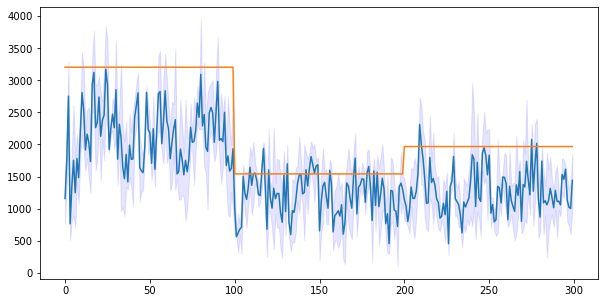

In [17]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

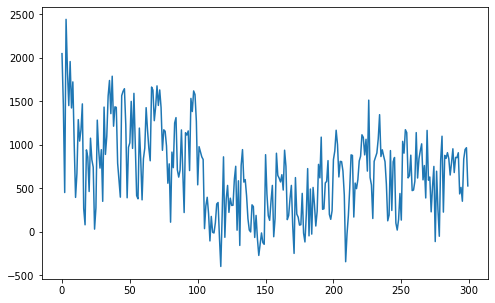

In [18]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

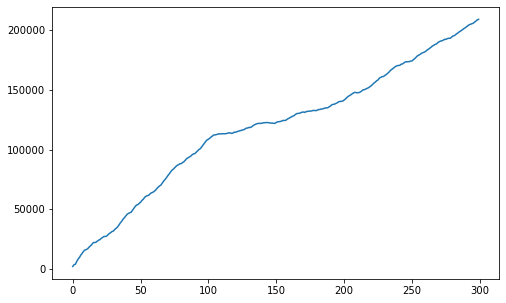

In [19]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

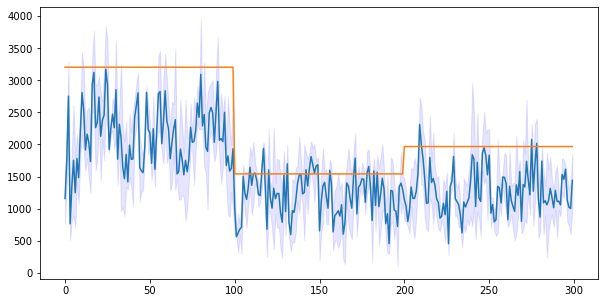

In [20]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

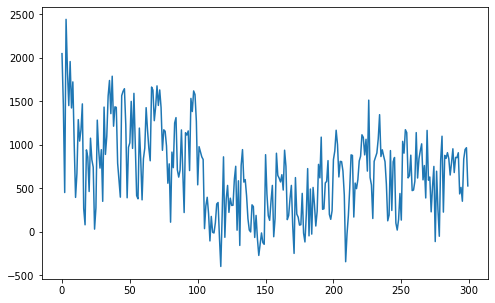

In [21]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

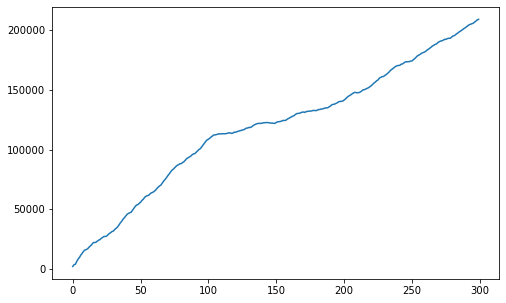

In [22]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()